## **Actividad 1 - Parte 1 (Logit a Probit)**
- **A01232580 - Víctor Benito García Rocha**

### **Importaciones**

In [5]:
from sklearn.metrics import classification_report, confusion_matrix  # Ev. y matriz
from sklearn.model_selection import train_test_split  # División de datos
import matplotlib.pyplot as plt  # Visualización de datos
import pandas as pd  # Manipulación y análisis de datos
import seaborn as sns  # Visualización de datos
import statsmodels.api as sm  # Modelos estadísticos

### **Carga de datos**

[**Finance Loan approval Prediction Data <---**](https://www.kaggle.com/datasets/krishnaraj30/finance-loan-approval-prediction-data/data)

In [6]:
train = pd.read_csv("train.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
test = pd.read_csv("test.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


Eliminar la columna "Loan_ID" ya que no aporta información útil para la predicción

In [8]:
train = train.drop("Loan_ID", axis=1)
test = test.drop("Loan_ID", axis=1)

Convertir los "Y" en 1 y "N" en 0

In [9]:
train["Loan_Status"] = train["Loan_Status"].map({"Y": 1, "N": 0})
train["Loan_Status"].unique()

array([1, 0])

### **Funciones**

Función para rellenar valores faltantes en columnas numéricas

In [10]:
def fill_missing_numeric(df, columns):
    """
    Rellena los valores faltantes en las columnas numéricas del DataFrame.

    Parámetros:
    df : DataFrame
        El DataFrame en el que se rellenarán los valores faltantes.
    columns : list
        Lista de nombres de columnas en las que se buscarán valores faltantes.
    """
    for col in columns:
        if df[col].isnull().sum() > 0:
            median = df[col].median()
            df[col] = df[col].fillna(median)


Función para rellenar valores faltantes en columnas categóricas

In [11]:
def fill_missing_categorical(df, columns):
    """
    Rellena los valores faltantes en las columnas categóricas del DataFrame.

    Parámetros:
    df : DataFrame
        El DataFrame en el que se rellenarán los valores faltantes.
    columns : list
        Lista de nombres de columnas en las que se buscarán valores faltantes.
    """
    for col in columns:
        if df[col].isnull().sum() > 0:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)


### **Acondicionamiento de datos**

Columnas numéricas y categóricas

In [12]:
numeric_cols = ["ApplicantIncome", "CoapplicantIncome",
                "LoanAmount", "Loan_Amount_Term", "Credit_History"]
categorical_cols = ["Gender", "Married", "Dependents",
                    "Education", "Self_Employed", "Property_Area"]

Rellenar valores faltantes en el conjunto de training

In [13]:
fill_missing_numeric(train, numeric_cols)
fill_missing_categorical(train, categorical_cols)

Rellenar valores faltantes en el conjunto de testing

In [14]:
fill_missing_numeric(test, numeric_cols)
fill_missing_categorical(test, categorical_cols)

Combinar los conjuntos para asegurar consistencia

In [15]:
combined = pd.concat(
    [train[categorical_cols], test[categorical_cols]], axis=0, ignore_index=True)


One-Hot Encoding

In [16]:
combined_encoded = pd.get_dummies(combined, drop_first=True)

Separar de nuevo train y test

In [17]:
train_encoded = combined_encoded[:len(train)]
test_encoded = combined_encoded[len(train):]

Incluir las características numéricas y las variables dummy categóricas

In [18]:
X = pd.concat([train[numeric_cols], train_encoded], axis=1)
y = train["Loan_Status"]

Dividir el conjunto de datos en conjuntos de entrenamiento y validación

In [19]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=16
)

Agregar una constante a las características para el modelo Probit

In [20]:
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)

Verificación de los datos

In [21]:
print(X_train.dtypes)

const                      float64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                   bool
Married_Yes                   bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Not Graduate        bool
Self_Employed_Yes             bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object


In [22]:
print(X_val.dtypes)

const                      float64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                   bool
Married_Yes                   bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Not Graduate        bool
Self_Employed_Yes             bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object


### **Probit**

Ajustar el modelo Probit

In [23]:
X_train = X_train.astype(float)
X_val = X_val.astype(float)
probit_model = sm.Probit(y_train, X_train)
result = probit_model.fit(disp=False)
print(result.summary())

                          Probit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  460
Model:                         Probit   Df Residuals:                      445
Method:                           MLE   Df Model:                           14
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.2751
Time:                        22:38:36   Log-Likelihood:                -204.30
converged:                       True   LL-Null:                       -281.84
Covariance Type:            nonrobust   LLR p-value:                 6.902e-26
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.1102      0.509     -2.183      0.029      -2.107      -0.113
ApplicantIncome         -3.656e-06   1.56e-05     -0.234      0.815   -3.43e-05     2.7e-05


Realizar predicciones en el conjunto de validación

In [24]:
y_pred_prob = result.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int)

Evaluar el modelo utilizando la matriz de confusión

In [25]:
cnf_matrix = confusion_matrix(y_val, y_pred)
print(cnf_matrix)

[[ 21  32]
 [  0 101]]


Visualizar la matriz de confusión

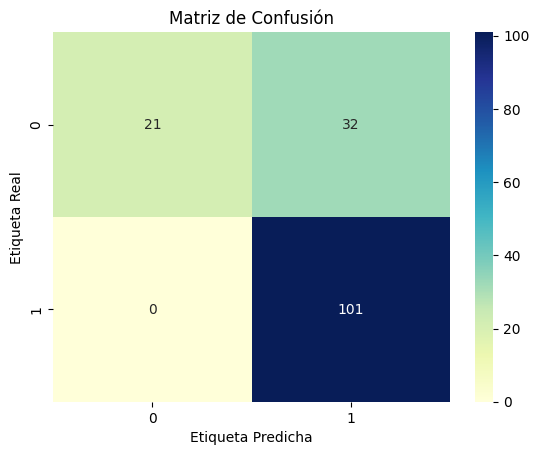

In [26]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

Resultado final

In [27]:
target_names = ["Rechazada", "Aprobada"]
print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Rechazada       1.00      0.40      0.57        53
    Aprobada       0.76      1.00      0.86       101

    accuracy                           0.79       154
   macro avg       0.88      0.70      0.72       154
weighted avg       0.84      0.79      0.76       154

